In [1]:
import os
import numpy as np
import pandas as pd
import uproot as ur

import sys
sys.path.append('../')
from jupyter_utils import *

from matplotlib import pyplot as plt
from IPython.display import Image
pd.set_option('display.max_columns', None) # to see all columns of df.head()
pd.set_option('display.max_rows', None)

from matplotlib.patches import PathPatch
from matplotlib.path import Path

# Lauren's colors
L_colors = ['red', 'darkorange', 'limegreen', 'green', 'deepskyblue', 'blue', 'black']
L_linestyles = ['solid', 'dashed']
L_markers = ['s', '^', 'v', 'd', 'P', "X", "*"]

In [2]:
# closure test? i.e. there is truth pythia data somewhere to compare to
closure = True

# define binnings
n_bins = 6 # WARNING RooUnfold seg faults if too many bins used
binning = np.array([5, 20, 40, 60, 80, 100, 150]).astype(float)
bincenters = get_lin_bincenters(binning)
binwidths = get_binwidths(binning)

labels = "jet $p_T$"

n_iter = 5

In [3]:
len(binning)

7

In [4]:
# file defs, hist imports

f_unfolded = ur.open("./unfolded_fr.root")
f_preunfold_rm = ur.open("./preunfold_closurefullsim.root")
f_preunfold_data = ur.open("./preunfold_fr.root")

# Data, reco [theta_unknown_S]
h3_raw = f_preunfold_data["raw"]
h1_raw = f_preunfold_data["raw1D"]

# MC, reco [theta0_S]
h3_reco = f_preunfold_rm["reco"]
h1_reco = f_preunfold_rm["reco1D"]

# MC, true [theta0_G]
h3_gen = f_preunfold_rm["gen"]
h1_gen = f_preunfold_rm["gen1D"]

h3_unfolded = []
for i in range(1,n_iter+1):
    h3_unfolded.append(f_unfolded["Baysian_Unfoldediter{}".format(i)])

h1_unfolded = []
for i in range(1,n_iter+1):
    h1_unfolded.append(f_unfolded["Baysian_Unfolded1Diter{}".format(i)])


In [5]:
proj = lambda a : a.values()
proj_err = lambda a : a.errors()

theta0_G = proj(h1_gen)
theta0_S = proj(h1_reco)
theta_unknown_S = proj(h1_raw)

theta_unfolded = [proj(a) for a in h1_unfolded]

theta0_G_err = proj_err(h1_gen)
theta0_S_err = proj_err(h1_reco)
theta_unknown_S_err = proj_err(h1_raw)

theta_unfolded_err = [proj_err(a) for a in h1_unfolded]


In [10]:
# print total number of jets

print(theta_unfolded[-1])
print("N unfolded jets : ")
for i in range(len(theta_unfolded)):
    print("\t i={}, {} +/- {}".format(i, np.sum(theta_unfolded[i]), np.sum(theta_unfolded_err[i])))

# TODO propagate error from here to actaul eec calculation

[4.58968425e+06 4.46776990e+04 2.60566629e+03 3.54391060e+02
 1.24426665e+02 4.14960963e+01]
N unfolded jets : 
	 i=0, 4637487.829506967 +/- 2357.339693010022
	 i=1, 4637487.913217307 +/- 2459.408743081762
	 i=2, 4637487.931011925 +/- 2507.6975054822833
	 i=3, 4637487.931939288 +/- 2532.641955555192
	 i=4, 4637487.929497432 +/- 2546.9175922930394


[8.96488764e+05 7.17646247e+03 3.51507114e+02 4.65076652e+01
 9.68018706e+00 3.98826620e+00]
(6,)
[  5.  20.  40.  60.  80. 100. 150.]
7
(array([8.96488764e+05, 7.17646247e+03, 3.51507114e+02, 4.65076652e+01,
       9.68018706e+00, 3.98826620e+00]), array([  5.,  20.,  40.,  60.,  80., 100., 150.]), <BarContainer object of 6 artists>)
6
6


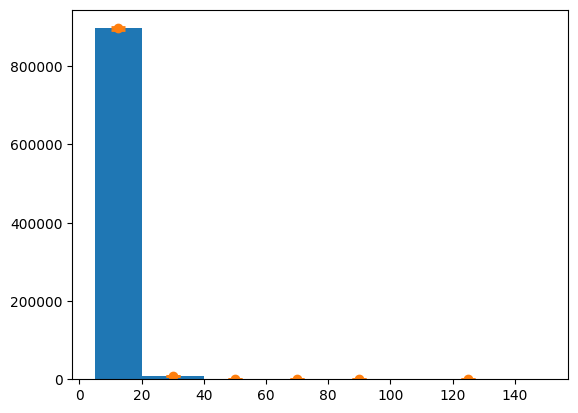

In [7]:
print(theta0_G)
print(theta0_G.shape)
print(binning)
print(len(binning))

print(plt.hist(binning[:-1], binning, weights=theta0_G))
print(len(binning[:-1]))
print(len(theta0_G_err))
plt.errorbar(bincenters, theta0_G, yerr=theta0_G_err, capsize=5, capthick=2, fmt='o', linestyle="None")
plt.show()

In [8]:
for iteration in range(n_iter):
    print(theta_unfolded[iteration])
    print(theta_unfolded_err[iteration])

[4.59285682e+06 4.17780706e+04 2.37928519e+03 3.45171259e+02
 9.10958011e+01 3.73818563e+01]
[2139.61414041  161.71253758   34.69225636   11.65409947    5.88117614
    3.78548304]
[4.59080801e+06 4.36054670e+04 2.55576089e+03 3.68184995e+02
 1.08250642e+02 4.22390078e+01]
[2144.75737704  227.28955648   52.7654323    18.39531883    9.89338534
    6.3076731 ]
[4.59006730e+06 4.42958898e+04 2.59957673e+03 3.66490582e+02
 1.15906213e+02 4.27668507e+01]
[2147.24397545  255.44281043   62.40172431   22.37015958   12.48806404
    7.75077169]
[4.58979123e+06 4.45668723e+04 2.60666008e+03 3.60268949e+02
 1.20671847e+02 4.22279658e+01]
[2148.32523692  268.1450674    67.99406491   25.08788564   14.41589767
    8.67380301]
[4.58968425e+06 4.46776990e+04 2.60566629e+03 3.54391060e+02
 1.24426665e+02 4.14960963e+01]
[2148.7969001   274.17030863   71.48932927   27.15556565   15.98249486
    9.32299378]


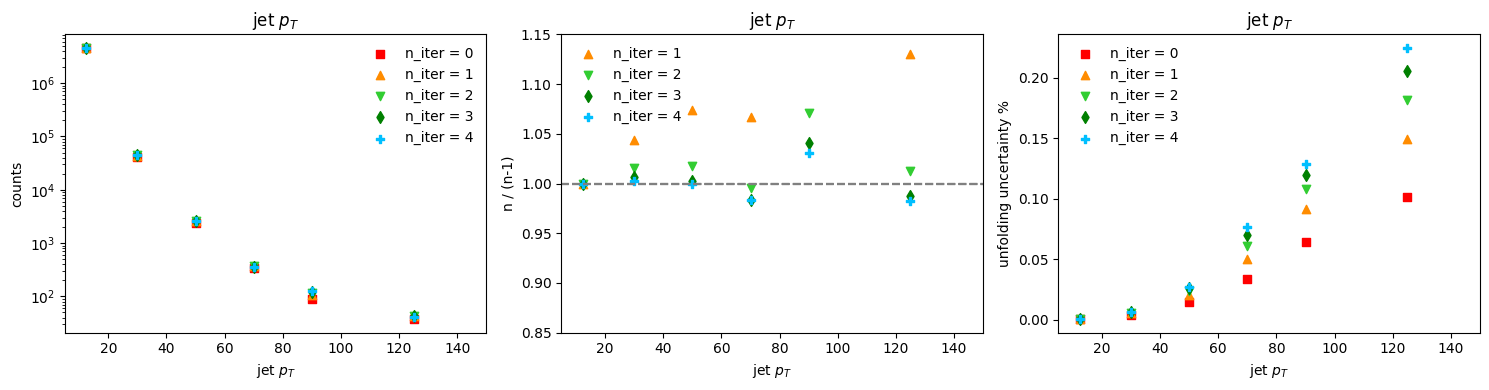

In [9]:
############################## UNFOLDED DISTRIBUTIONS ############################
# EEC distros

it = 5

fig, axes = plt.subplots(1, 3, figsize=(15,4))

pt_lims = [5, 150]

# COL 1: raw jet pt distribution WITH relative error over data, true underneath
ax = axes[0]

for iteration in range(it):

    ax.scatter(bincenters, theta_unfolded[iteration],color=L_colors[iteration],marker=L_markers[iteration],label="n_iter = {}".format(iteration),lw=1)
    ax.set_ylabel("counts")
    
    ax.set_title(labels)
    ax.set_xlabel(labels)
    ax.set_yscale("log")

    ax.legend(frameon=False)

    ax.set_xlim(pt_lims)

# COL 2: convergence plot (n / n - 1)
ax = axes[1]

for iteration in range(1,it):

    yvals = safe_divide(theta_unfolded[iteration], theta_unfolded[iteration-1], filler=1)
    ax.scatter(bincenters, yvals, color=L_colors[iteration],marker=L_markers[iteration],label="n_iter = {}".format(iteration),lw=1)

    ax.hlines(y=1, xmin=binning[0], xmax=binning[len(binning)-1], color='grey', linestyle='--')

    ax.set_title(labels)
    ax.set_xlabel(labels)
    ax.set_ylabel("n / (n-1)")
    ax.legend(frameon=False)

    ax.set_ylim([0.85, 1.15])
    ax.set_xlim(pt_lims)


# COL 3: statistical error %
ax = axes[2]

for iteration in range(it):
    
    yvals = safe_divide(theta_unfolded_err[iteration], theta_unfolded[iteration])
    ax.scatter(bincenters, yvals, color=L_colors[iteration],marker=L_markers[iteration],label="n_iter = {}".format(iteration),lw=1)

    ax.set_title(labels)
    ax.set_xlabel(labels)
    ax.set_ylabel("unfolding uncertainty %")
    ax.legend(frameon=False)

    ax.set_xlim(pt_lims)


fig.tight_layout()
plt.show()
